# Ferrous Material Classification Using ML Classifiers

### In this model, various machine learning classifier models are used to classify the materials into two primary categories: Ferrous and Non-ferrous. Through the application of advanced algorithms, our model aims to efficiently distinguish between different material compositions, contributing to accurate and automated ferrous material classification.

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import sweetviz as sv

In [2]:
# Load dataset
data = pd.read_csv('mat_prop.csv')

In [3]:
data.head()

,category,references,names,Niobium (Nb),Oxygen (O),Tungsten (W),Lithium (Li),Nitrogen (N),Chlorine (Cl),Magnesium (Mg),...,Bismuth (Bi),Arsenic (As),Sodium (Na),Residuals,Chromium (Cr),Manganese (Mn),Hafnium (Hf),Beryllium (Be),Tantalum (Ta),material_type
0,system.chemical,[{'url': 'http://www.makeitfrom.com/material-p...,"['7075 (AlZn5.5MgCu, 3.4365, 2L95, A97075) Alu...",NaN,NaN,NaN,NaN,NaN,NaN,2.1,...,NaN,NaN,NaN,0.15,0.18,0.3,NaN,NaN,NaN,non_ferrous
1,system.chemical,[{'url': 'http://www.makeitfrom.com/material-p...,"['UNS S45500 (Alloy 455, XM-16) Stainless Steel']",0.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.50,0.5,NaN,NaN,0.5,ferrous
2,system.chemical,[{'url': 'http://www.makeitfrom.com/material-p...,"['6110 (6110-T9, A96110) Aluminum']",NaN,NaN,NaN,NaN,NaN,NaN,0.5,...,NaN,NaN,NaN,0.15,0.04,0.2,NaN,NaN,NaN,non_ferrous
3,system.chemical,[{'url': 'http://www.makeitfrom.com/material-p...,['Zinc-Lead Rolled Zinc Alloy (Z20301)'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non_ferrous
4,system.chemical,[{'url': 'http://www.makeitfrom.com/material-p...,['Acrylonitrile Styrene Acrylate (ASA)'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non_ferrous


In [4]:
data.columns

Index(['category', 'references', 'names', 'Niobium (Nb)', 'Oxygen (O)',
       'Tungsten (W)', 'Lithium (Li)', 'Nitrogen (N)', 'Chlorine (Cl)',
       'Magnesium (Mg)', 'Boron (B)', 'Copper (Cu)', 'Sulfur (S)',
       'Carbon (C)', 'Silver (Ag)', 'Antimony (Sb)', 'Vanadium (V)',
       'Lead (Pb)', 'Cobalt (Co)', 'Palladium (Pd)', 'Calcium (Ca)',
       'Selenium (Se)', 'Ruthenium (Ru)', 'Titanium (Ti)', 'Yttrium (Y)',
       'Silicon (Si)', 'Zirconium (Zr)', 'Tin (Sn)', 'Gold (Au)',
       'Tellurium (Te)', 'Lanthanum (La)', 'Unspecified Rare Earths',
       'Molybdenum (Mo)', 'Cerium (Ce)', 'Iridium (Ir)', 'Gallium (Ga)',
       'Iron (Fe)', 'Hydrogen (H)', 'Cadmium (Cd)', 'Platinum (Pt)',
       'Phosphorus (P)', 'Zinc (Zn)', 'Aluminum (Al)', 'Nickel (Ni)',
       'Bismuth (Bi)', 'Arsenic (As)', 'Sodium (Na)', 'Residuals',
       'Chromium (Cr)', 'Manganese (Mn)', 'Hafnium (Hf)', 'Beryllium (Be)',
       'Tantalum (Ta)', 'material_type'],
      dtype='object')

In [5]:
data.drop(['category', 'references', 'names'], axis=1, inplace=True)

* These three columns are unnecessary for model training. Therefore, they have been excluded from the dataset

In [6]:
data.columns

Index(['Niobium (Nb)', 'Oxygen (O)', 'Tungsten (W)', 'Lithium (Li)',
       'Nitrogen (N)', 'Chlorine (Cl)', 'Magnesium (Mg)', 'Boron (B)',
       'Copper (Cu)', 'Sulfur (S)', 'Carbon (C)', 'Silver (Ag)',
       'Antimony (Sb)', 'Vanadium (V)', 'Lead (Pb)', 'Cobalt (Co)',
       'Palladium (Pd)', 'Calcium (Ca)', 'Selenium (Se)', 'Ruthenium (Ru)',
       'Titanium (Ti)', 'Yttrium (Y)', 'Silicon (Si)', 'Zirconium (Zr)',
       'Tin (Sn)', 'Gold (Au)', 'Tellurium (Te)', 'Lanthanum (La)',
       'Unspecified Rare Earths', 'Molybdenum (Mo)', 'Cerium (Ce)',
       'Iridium (Ir)', 'Gallium (Ga)', 'Iron (Fe)', 'Hydrogen (H)',
       'Cadmium (Cd)', 'Platinum (Pt)', 'Phosphorus (P)', 'Zinc (Zn)',
       'Aluminum (Al)', 'Nickel (Ni)', 'Bismuth (Bi)', 'Arsenic (As)',
       'Sodium (Na)', 'Residuals', 'Chromium (Cr)', 'Manganese (Mn)',
       'Hafnium (Hf)', 'Beryllium (Be)', 'Tantalum (Ta)', 'material_type'],
      dtype='object')

In [7]:
data.head()

,Niobium (Nb),Oxygen (O),Tungsten (W),Lithium (Li),Nitrogen (N),Chlorine (Cl),Magnesium (Mg),Boron (B),Copper (Cu),Sulfur (S),...,Bismuth (Bi),Arsenic (As),Sodium (Na),Residuals,Chromium (Cr),Manganese (Mn),Hafnium (Hf),Beryllium (Be),Tantalum (Ta),material_type
0,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,1.200,NaN,...,NaN,NaN,NaN,0.15,0.18,0.3,NaN,NaN,NaN,non_ferrous
1,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.500,0.03,...,NaN,NaN,NaN,NaN,12.50,0.5,NaN,NaN,0.5,ferrous
2,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,0.200,NaN,...,NaN,NaN,NaN,0.15,0.04,0.2,NaN,NaN,NaN,non_ferrous
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non_ferrous
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non_ferrous


In [8]:
data.isnull().sum()

Niobium (Nb)               1002
Oxygen (O)                  988
Tungsten (W)               1025
Lithium (Li)               1069
Nitrogen (N)                908
Chlorine (Cl)              1068
Magnesium (Mg)              824
Boron (B)                  1051
Copper (Cu)                 623
Sulfur (S)                  716
Carbon (C)                  672
Silver (Ag)                1055
Antimony (Sb)              1029
Vanadium (V)               1024
Lead (Pb)                   885
Cobalt (Co)                1018
Palladium (Pd)             1050
Calcium (Ca)               1068
Selenium (Se)              1068
Ruthenium (Ru)             1061
Titanium (Ti)               770
Yttrium (Y)                1064
Silicon (Si)                480
Zirconium (Zr)             1009
Tin (Sn)                    935
Gold (Au)                  1066
Tellurium (Te)             1069
Lanthanum (La)             1068
Unspecified Rare Earths    1062
Molybdenum (Mo)             899
Cerium (Ce)                1065
Iridium 

In [9]:
data.describe()

,Niobium (Nb),Oxygen (O),Tungsten (W),Lithium (Li),Nitrogen (N),Chlorine (Cl),Magnesium (Mg),Boron (B),Copper (Cu),Sulfur (S),...,Nickel (Ni),Bismuth (Bi),Arsenic (As),Sodium (Na),Residuals,Chromium (Cr),Manganese (Mn),Hafnium (Hf),Beryllium (Be),Tantalum (Ta)
count,68.000000,82.000000,45.000000,1.0,162.000000,2.0,246.000000,19.000000,447.000000,354.000000,...,377.000000,18.000000,13.000000,2.0,448.000000,200.000000,591.000000,14.000000,8.000000,19.000000
mean,8.163529,0.169988,3.535778,0.2,0.100444,0.2,13.141327,0.014632,16.413195,0.034808,...,10.555523,0.446994,0.158462,0.2,0.372545,5.490200,0.930660,10.348571,0.749125,23.728947
std,25.103425,0.114045,13.673740,NaN,0.094499,0.0,30.883928,0.023289,32.993573,0.022770,...,18.927889,0.904978,0.215013,0.0,0.488174,8.575057,1.297865,25.875056,0.825885,40.587927
min,0.050000,0.000500,0.030000,0.2,0.002000,0.2,0.001500,0.001000,0.003000,0.002000,...,0.001000,0.005900,0.020000,0.2,0.050000,0.010000,0.010000,0.020000,0.003000,0.100000
25%,0.275000,0.100000,0.300000,0.2,0.030000,0.2,0.200000,0.004000,0.150000,0.020000,...,0.300000,0.100000,0.050000,0.2,0.150000,0.100000,0.250000,1.140000,0.122500,0.150000
50%,0.900000,0.180000,1.000000,0.2,0.065000,0.2,0.500000,0.007000,0.500000,0.030000,...,1.000000,0.200000,0.100000,0.2,0.300000,0.250000,0.550000,4.500000,0.300000,0.500000
75%,2.050000,0.250000,2.500000,0.2,0.150000,0.2,2.350000,0.013500,3.700000,0.050000,...,8.500000,0.400000,0.150000,0.2,0.500000,11.500000,1.000000,4.500000,1.650000,30.700000
max,99.700000,0.400000,92.500000,0.2,0.450000,0.2,98.700000,0.100000,99.990000,0.200000,...,77.700000,4.000000,0.800000,0.2,7.500000,32.300000,15.500000,99.800000,1.800000,99.800000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Niobium (Nb)             68 non-null     float64
 1   Oxygen (O)               82 non-null     float64
 2   Tungsten (W)             45 non-null     float64
 3   Lithium (Li)             1 non-null      float64
 4   Nitrogen (N)             162 non-null    float64
 5   Chlorine (Cl)            2 non-null      float64
 6   Magnesium (Mg)           246 non-null    float64
 7   Boron (B)                19 non-null     float64
 8   Copper (Cu)              447 non-null    float64
 9   Sulfur (S)               354 non-null    float64
 10  Carbon (C)               398 non-null    float64
 11  Silver (Ag)              15 non-null     float64
 12  Antimony (Sb)            41 non-null     float64
 13  Vanadium (V)             46 non-null     float64
 14  Lead (Pb)               

In [11]:
data.shape

(1070, 51)

In [12]:
data.fillna(0, inplace=True)

Reason:
* Considering the diverse chemical compositions of various materials, certain elements may be absent. Hence, any NaN values were replaced with zeros to ensure completeness

In [13]:
data.head()

,Niobium (Nb),Oxygen (O),Tungsten (W),Lithium (Li),Nitrogen (N),Chlorine (Cl),Magnesium (Mg),Boron (B),Copper (Cu),Sulfur (S),...,Bismuth (Bi),Arsenic (As),Sodium (Na),Residuals,Chromium (Cr),Manganese (Mn),Hafnium (Hf),Beryllium (Be),Tantalum (Ta),material_type
0,0.0,0.0,0.0,0.0,0.0,0.0,2.1,0.0,1.200,0.00,...,0.0,0.0,0.0,0.15,0.18,0.3,0.0,0.0,0.0,non_ferrous
1,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.500,0.03,...,0.0,0.0,0.0,0.00,12.50,0.5,0.0,0.0,0.5,ferrous
2,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.200,0.00,...,0.0,0.0,0.0,0.15,0.04,0.2,0.0,0.0,0.0,non_ferrous
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005,0.00,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,non_ferrous
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,non_ferrous


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Niobium (Nb)             1070 non-null   float64
 1   Oxygen (O)               1070 non-null   float64
 2   Tungsten (W)             1070 non-null   float64
 3   Lithium (Li)             1070 non-null   float64
 4   Nitrogen (N)             1070 non-null   float64
 5   Chlorine (Cl)            1070 non-null   float64
 6   Magnesium (Mg)           1070 non-null   float64
 7   Boron (B)                1070 non-null   float64
 8   Copper (Cu)              1070 non-null   float64
 9   Sulfur (S)               1070 non-null   float64
 10  Carbon (C)               1070 non-null   float64
 11  Silver (Ag)              1070 non-null   float64
 12  Antimony (Sb)            1070 non-null   float64
 13  Vanadium (V)             1070 non-null   float64
 14  Lead (Pb)               

In [15]:
data.material_type.unique()

array(['non_ferrous', 'ferrous'], dtype=object)

In [16]:
data.material_type.value_counts()

non_ferrous    822
ferrous        248
Name: material_type, dtype: int64

* The data is not balanced

In [17]:
pd.set_option('display.max_columns', None)
data.describe()

,Niobium (Nb),Oxygen (O),Tungsten (W),Lithium (Li),Nitrogen (N),Chlorine (Cl),Magnesium (Mg),Boron (B),Copper (Cu),Sulfur (S),Carbon (C),Silver (Ag),Antimony (Sb),Vanadium (V),Lead (Pb),Cobalt (Co),Palladium (Pd),Calcium (Ca),Selenium (Se),Ruthenium (Ru),Titanium (Ti),Yttrium (Y),Silicon (Si),Zirconium (Zr),Tin (Sn),Gold (Au),Tellurium (Te),Lanthanum (La),Unspecified Rare Earths,Molybdenum (Mo),Cerium (Ce),Iridium (Ir),Gallium (Ga),Iron (Fe),Hydrogen (H),Cadmium (Cd),Platinum (Pt),Phosphorus (P),Zinc (Zn),Aluminum (Al),Nickel (Ni),Bismuth (Bi),Arsenic (As),Sodium (Na),Residuals,Chromium (Cr),Manganese (Mn),Hafnium (Hf),Beryllium (Be),Tantalum (Ta)
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,0.518804,0.013027,0.148701,0.000187,0.015207,0.000374,3.021277,0.000260,6.856727,0.011516,0.048755,0.286004,0.045579,0.062916,0.333939,0.461822,0.206299,0.000318,0.000280,0.000449,4.537047,0.011463,0.721836,0.922991,0.497888,0.208131,0.000374,0.000033,0.013972,1.015318,0.000159,0.022430,0.000168,15.345631,0.000795,0.000607,0.189159,0.045312,2.773679,17.930208,3.719095,0.007520,0.001925,0.000374,0.155981,1.026206,0.514037,0.135402,0.005601,0.421355
std,6.592930,0.055065,2.863540,0.006114,0.051404,0.008643,15.786252,0.003587,22.798129,0.020969,0.120037,4.440838,0.579349,0.498965,4.160644,4.489268,4.001295,0.009251,0.006482,0.005384,19.856199,0.216879,1.782062,9.244029,4.708269,3.772288,0.012228,0.000930,0.168284,7.265494,0.002383,0.529717,0.002241,30.272606,0.003279,0.005297,3.777343,0.217898,12.666118,35.827352,12.306984,0.127796,0.028646,0.008643,0.365325,4.274758,1.069598,3.086442,0.092923,6.129341
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.020000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.737500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.030000,0.200000,2.500000,0.400000,0.000000,0.000000,0.000000,0.200000,0.000000,0.600000,0.000000,0.000000,0.000000
max,

Insights: 
* These elements such as Oxygen, Lithium, Nitrogen, Chlorine, Boron, Sulfur, Calcium, Selenium, Ruthenium, Tellurium, Lanthanum, Cerium, Gallium, Hydrogen, Cadmium and Sodium are less than 1 weight percentage. These are called as trace elements.

## Exploratory data analysis (EDA)

In [18]:
#Univariate Analysis:
my_report = sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


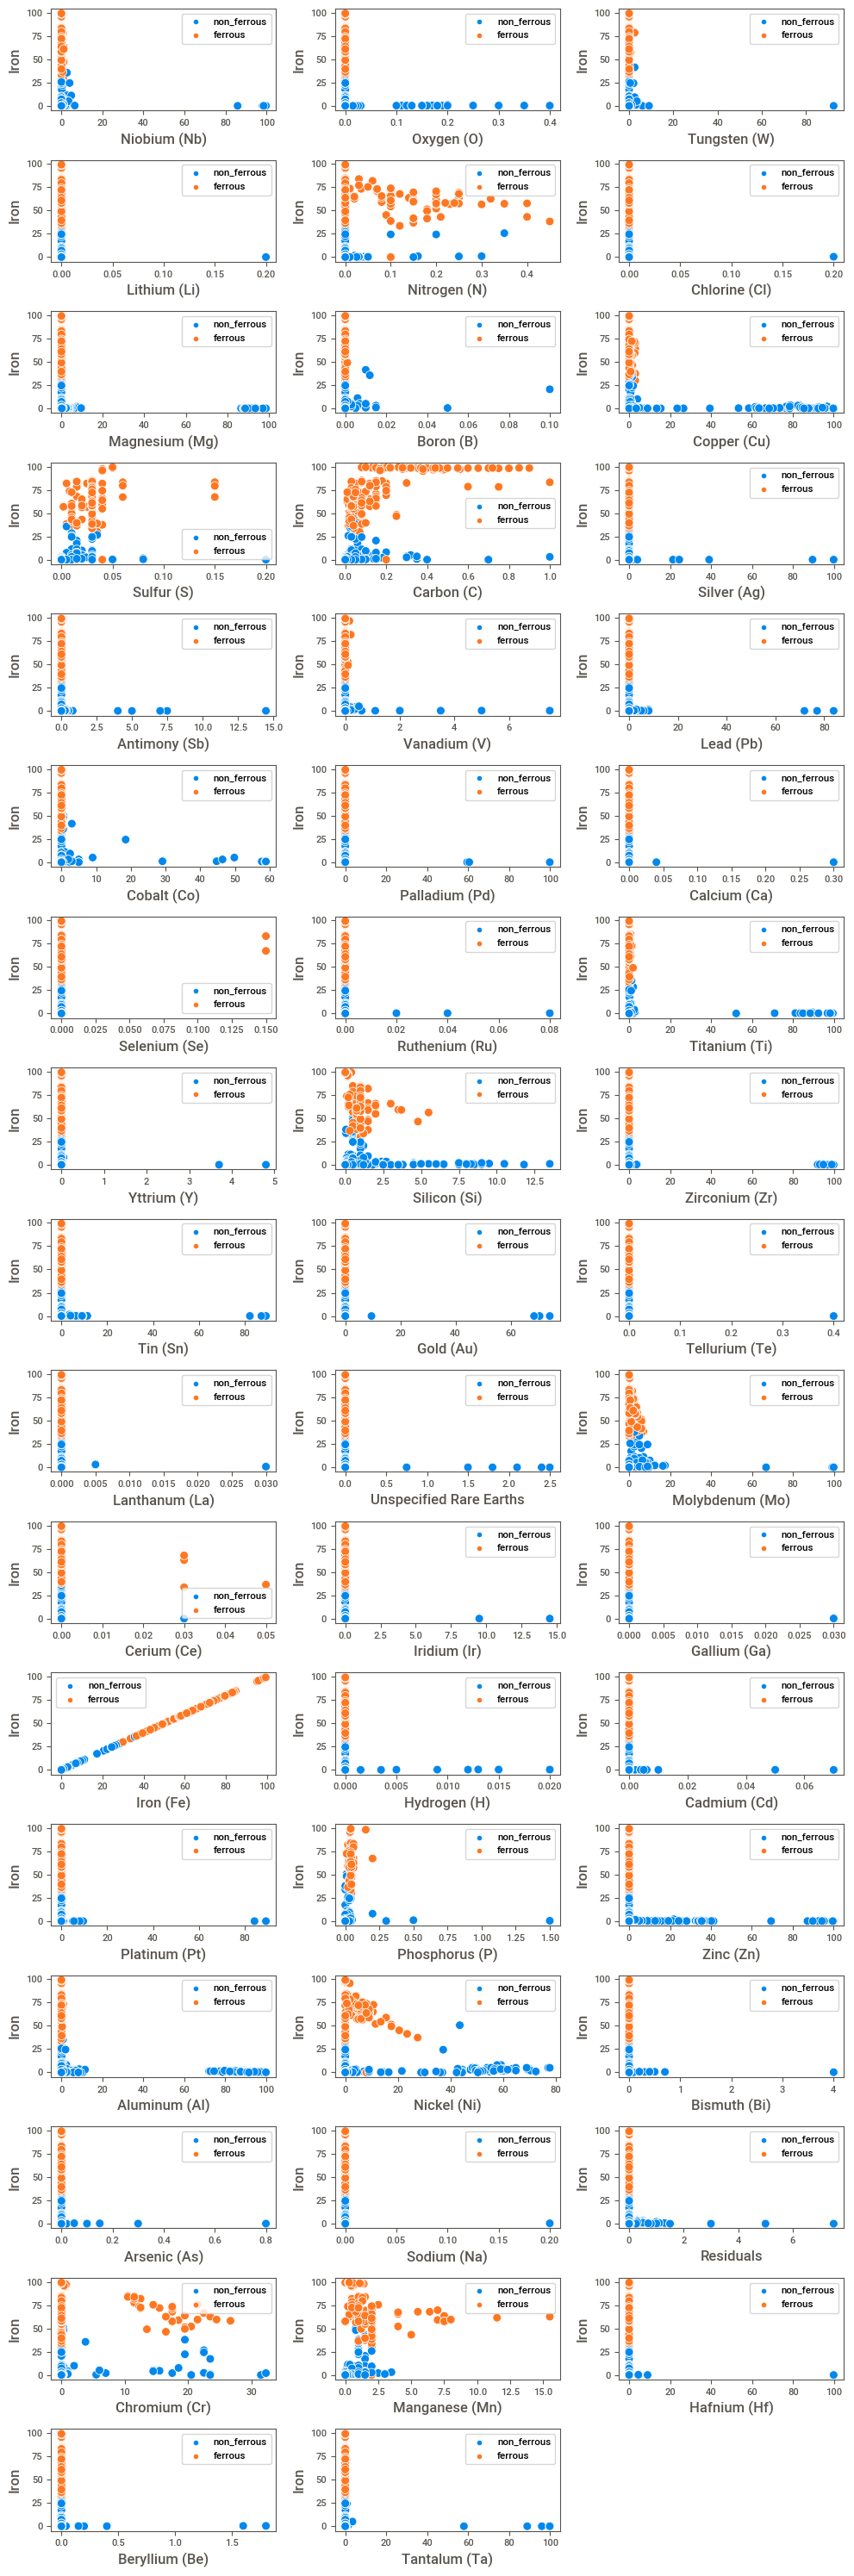

In [19]:
plt.figure(figsize=(10,30),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=50:
        ax = plt.subplot(17,3,plotnumber)
        sns.scatterplot(x=data[column], y=data['Iron (Fe)'],hue=data['material_type'], marker='o', s=50)
        plt.ylabel('Iron',fontsize=12)
        plt.xlabel(column, fontsize=12)
        plt.legend(fontsize='small')
    plotnumber+=1
plt.tight_layout()
plt.show()

Insights:
* Ferrous classification is based on the primary element such as iron, and its comparison with other elements to determine material categorization.
* Notably, the majority of materials fall into the non-ferrous category.
* The presence of elements such as carbon, manganese, chromium, nickel, sulfur, and nitrogen plays a significant role in ferrous classification

### Checking outliers

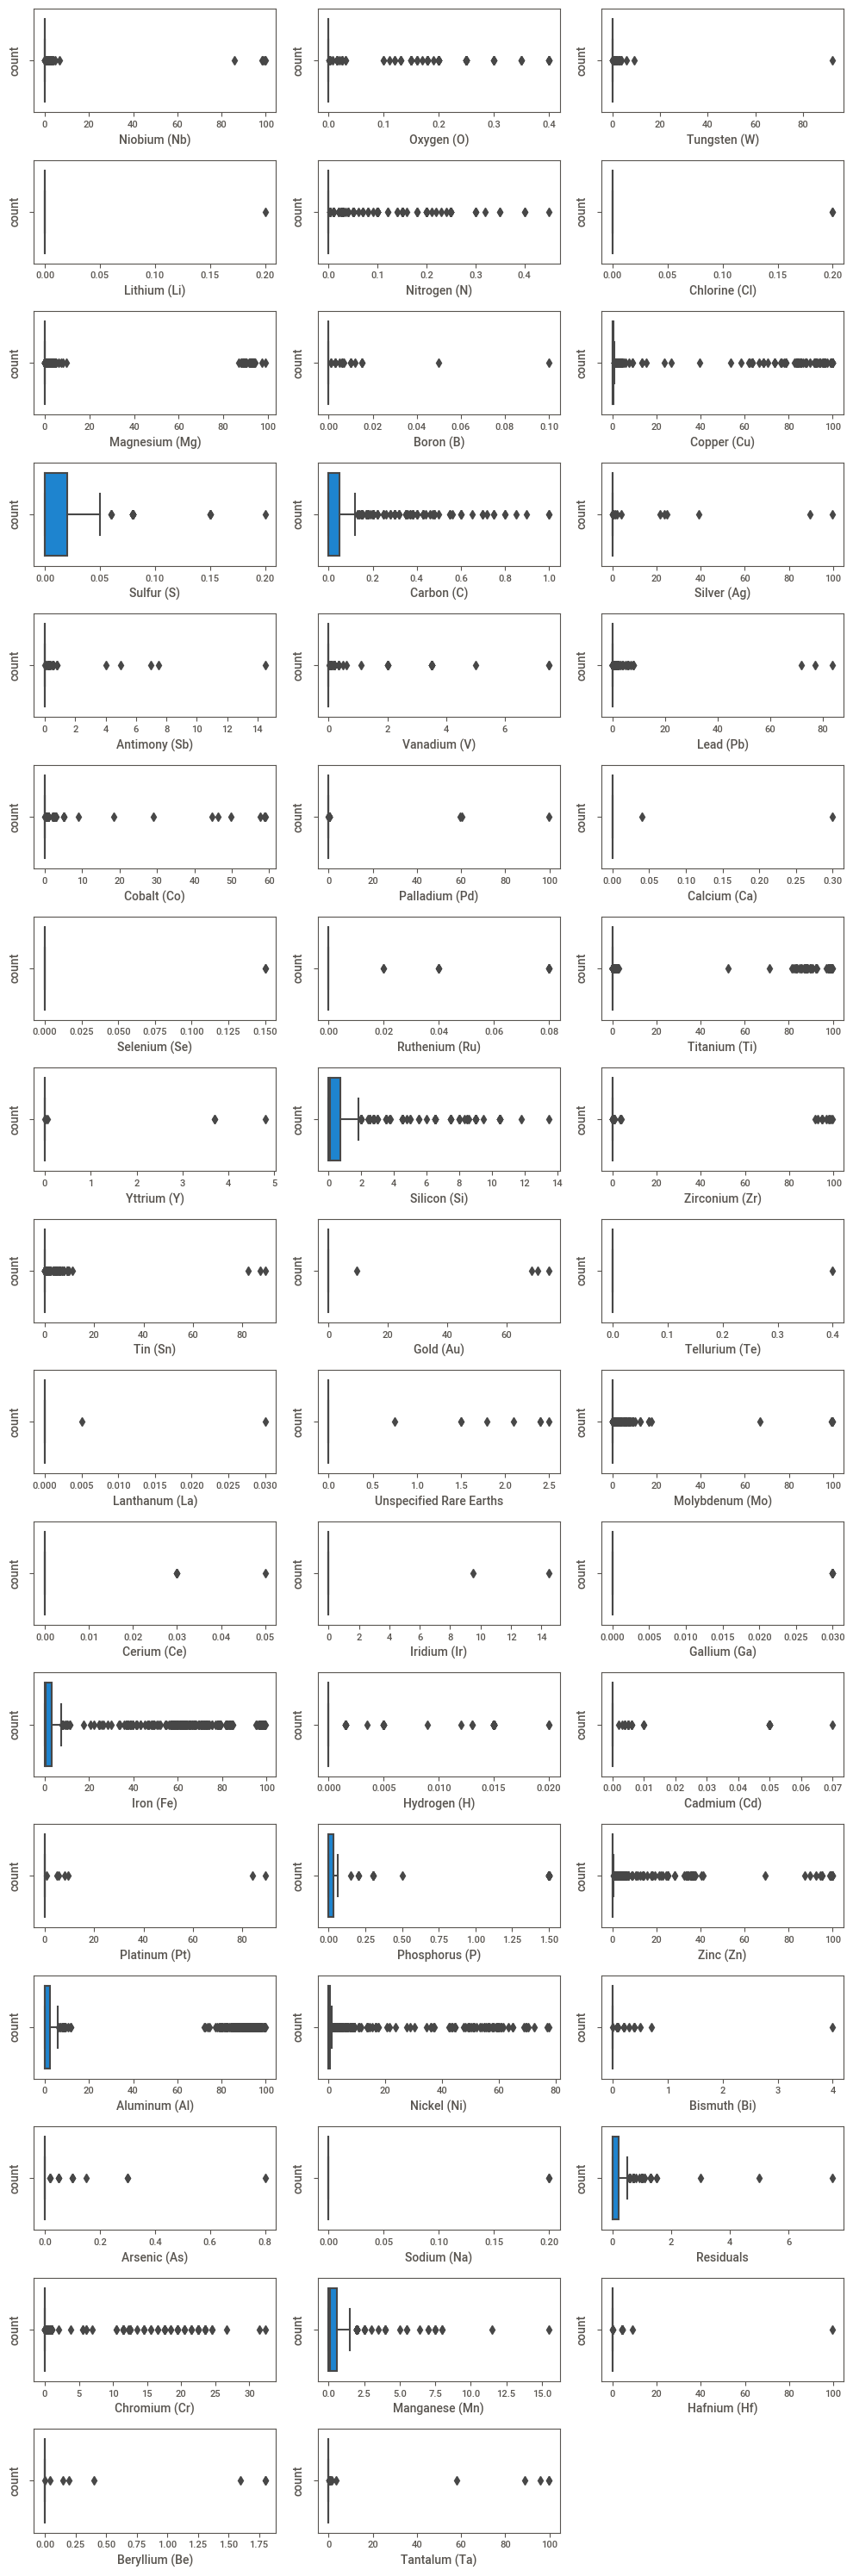

In [20]:
plt.figure(figsize=(10,30),facecolor='white')
plotnumber=1

for column in data.drop('material_type', axis=1):
    if plotnumber<=50:
        ax = plt.subplot(17,3,plotnumber)
        sns.boxplot(x= data[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('count', fontsize=10)
    plotnumber+=1
plt.tight_layout()
plt.show()

Reason:
* No imputation is performed for outliers here, as each element's influence on material properties is considered significant

## Feature Engineering

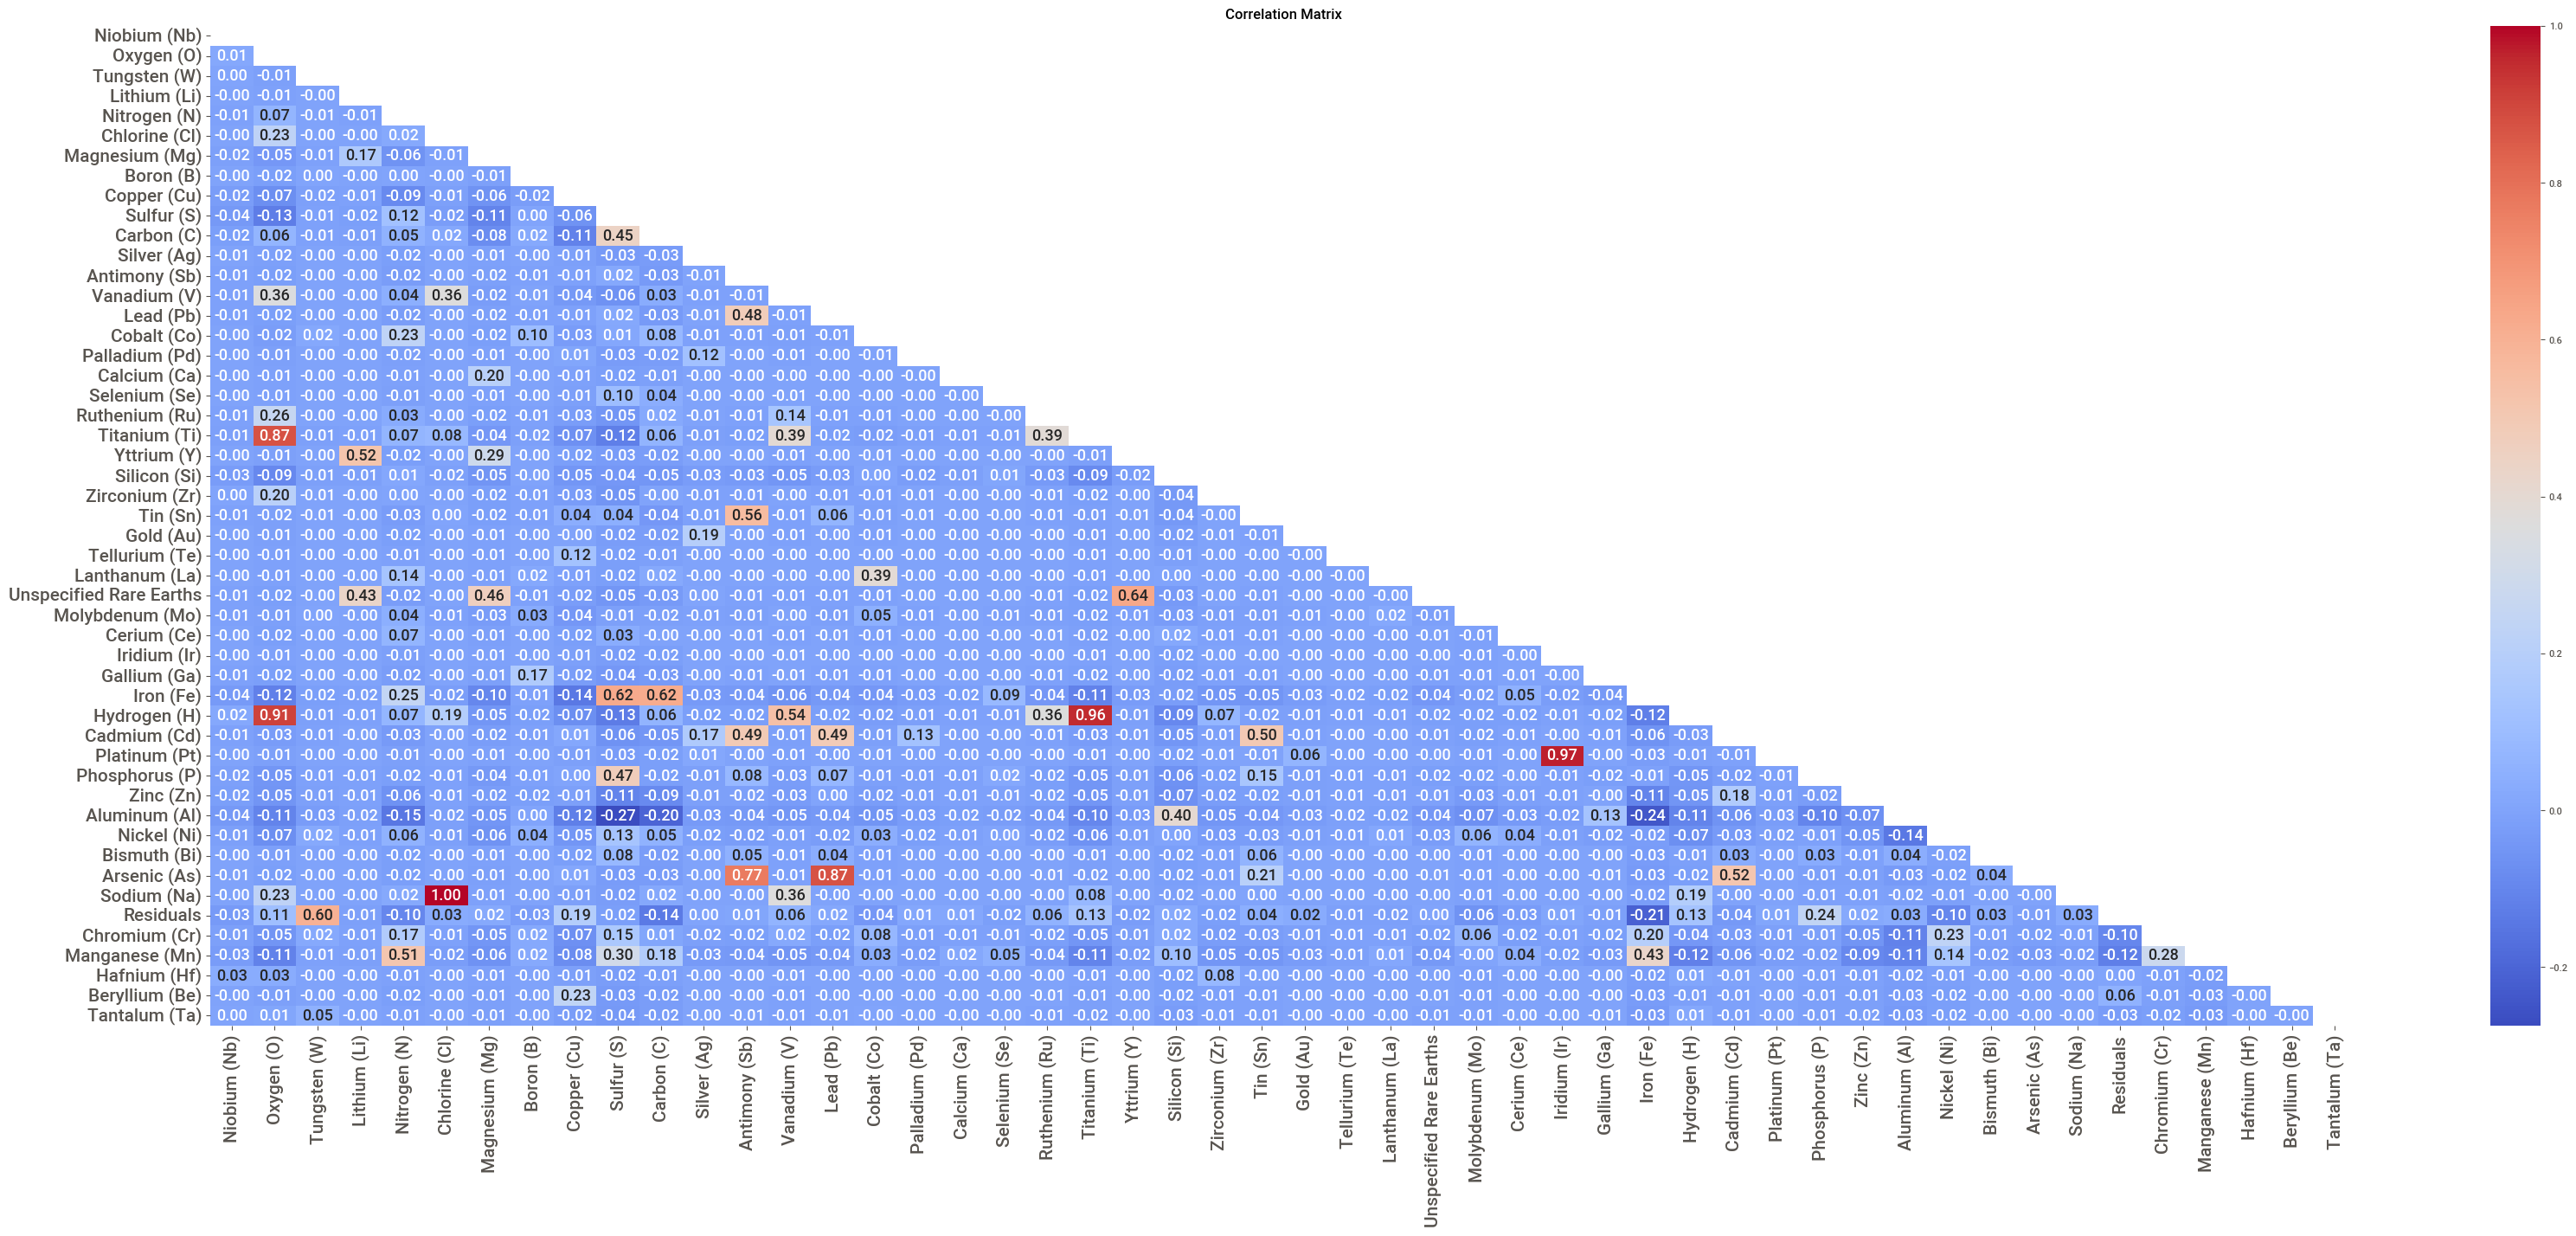

In [21]:
#correlation check
correlation_matrix = data.corr()
# mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(40,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask, annot_kws={"size":13})
plt.title('Correlation Matrix')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [22]:
data.drop(['Oxygen (O)', 'Chlorine (Cl)', 'Arsenic (As)', 'Hydrogen (H)', 'Iridium (Ir)'], axis=1, inplace= True)

* These 'Oxygen (O)', 'Chlorine (Cl)', 'Arsenic (As)', 'Hydrogen (H)' and 'Iridium (Ir)' columns has high (more than 80 %) of correlation. Therefore, these were dropped.

In [23]:
# Manual encoding:
data.material_type=data.material_type.replace({'non_ferrous':0, 'ferrous':1})

In [24]:
data.material_type.value_counts()

0    822
1    248
Name: material_type, dtype: int64

In [25]:
from sklearn.preprocessing import MinMaxScaler
target_column = data['material_type']
input_features = data.drop('material_type', axis=1)
scaling = MinMaxScaler()
input_features_scaled = scaling.fit_transform(input_features)
input_features_scaled_df = pd.DataFrame(input_features_scaled, columns=input_features.columns)
data_scaled = pd.concat([input_features_scaled_df, target_column], axis=1)
print(data_scaled.head())

   Niobium (Nb)  Tungsten (W)  Lithium (Li)  Nitrogen (N)  Magnesium (Mg)  \
0      0.000000           0.0           0.0           0.0        0.021277   
1      0.005015           0.0           0.0           0.0        0.000000   
2      0.000000           0.0           0.0           0.0        0.005066   
3      0.000000           0.0           0.0           0.0        0.000000   
4      0.000000           0.0           0.0           0.0        0.000000   

   Boron (B)  Copper (Cu)  Sulfur (S)  Carbon (C)  Silver (Ag)  Antimony (Sb)  \
0        0.0     0.012001        0.00        0.00          0.0            0.0   
1        0.0     0.015002        0.15        0.05          0.0            0.0   
2        0.0     0.002000        0.00        0.00          0.0            0.0   
3        0.0     0.000050        0.00        0.00          0.0            0.0   
4        0.0     0.000000        0.00        0.00          0.0            0.0   

   Vanadium (V)  Lead (Pb)  Cobalt (Co)  Palladium

## Model Building

In [26]:
# Split data into x and y
x = data_scaled.drop('material_type',axis=1)
y= data_scaled.material_type

In [27]:
# Split data for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

### Balacing the data

In [28]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [29]:
x_smote, y_smote = smote.fit_resample(x_train, y_train)

In [30]:
y_train.value_counts()

0    568
1    181
Name: material_type, dtype: int64

In [31]:
y_smote.value_counts()

0    568
1    568
Name: material_type, dtype: int64

### Logistic Regression

In [32]:
# Model
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(x_smote, y_smote)
y_lr = model_lr.predict(x_test)
from sklearn.metrics import classification_report
report_lr = classification_report(y_test, y_lr)
print(report_lr)
print('-------------------------------------------------------')
ct_lr = pd.crosstab(y_test, y_lr)
print(ct_lr)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       254
           1       0.93      0.85      0.89        67

    accuracy                           0.96       321
   macro avg       0.95      0.92      0.93       321
weighted avg       0.96      0.96      0.96       321

-------------------------------------------------------
col_0            0   1
material_type         
0              250   4
1               10  57


### Support Vector Classifier

In [33]:
# Model
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(x_smote, y_smote)
y_svm = model_svm.predict(x_test)
report_svm = classification_report(y_test, y_svm)
print(report_svm)
print('-------------------------------------------------------')
ct_svm = pd.crosstab(y_test, y_svm)
print(ct_svm)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       254
           1       0.92      0.88      0.90        67

    accuracy                           0.96       321
   macro avg       0.95      0.93      0.94       321
weighted avg       0.96      0.96      0.96       321

-------------------------------------------------------
col_0            0   1
material_type         
0              249   5
1                8  59


### Decision Tree Classifier

In [34]:
# Model
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(x_smote, y_smote)
y_dt = model_dt.predict(x_test)
report_dt = classification_report(y_test, y_dt)
print(report_dt)
print('-------------------------------------------------------')
ct_dt = pd.crosstab(y_test, y_dt)
print(ct_dt)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       254
           1       1.00      0.91      0.95        67

    accuracy                           0.98       321
   macro avg       0.99      0.96      0.97       321
weighted avg       0.98      0.98      0.98       321

-------------------------------------------------------
col_0            0   1
material_type         
0              254   0
1                6  61


### Random Forest Classifier

In [35]:
# Model
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(x_smote, y_smote)
y_rf = model_rf.predict(x_test)
report_rf = classification_report(y_test, y_rf)
print(report_rf)
print('-------------------------------------------------------')
ct_rf = pd.crosstab(y_test, y_rf)
print(ct_rf)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       254
           1       0.98      0.91      0.95        67

    accuracy                           0.98       321
   macro avg       0.98      0.95      0.97       321
weighted avg       0.98      0.98      0.98       321

-------------------------------------------------------
col_0            0   1
material_type         
0              253   1
1                6  61


### Boosting

In [36]:
# Model
from xgboost import XGBClassifier
model_xg = XGBClassifier()
model_xg.fit(x_smote, y_smote)
y_xg = model_xg.predict(x_test)
report_xg = classification_report(y_test, y_xg)
print(report_xg)
print('-------------------------------------------------------')
ct_xg = pd.crosstab(y_test, y_xg)
print(ct_xg)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       254
           1       1.00      0.91      0.95        67

    accuracy                           0.98       321
   macro avg       0.99      0.96      0.97       321
weighted avg       0.98      0.98      0.98       321

-------------------------------------------------------
col_0            0   1
material_type         
0              254   0
1                6  61


## Summary

* Accuracy got improved from using logistic regression to boosting technique.
* The classification of XG boost and random forest are better than other models.